In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d dhirensk/cats-vs-dogs-training8000test2000
!chmode 600 ~/.kaggle/kaggle.json

 99% 433M/436M [00:04<00:00, 52.7MB/s]
100% 436M/436M [00:04<00:00, 98.3MB/s]
/bin/bash: line 1: chmode: command not found


In [3]:
!unzip -qq cats-vs-dogs-training8000test2000.zip

In [4]:
# generating image dataset from directory
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    directory = '/content/dataset/training_set',
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    directory = '/content/dataset/test_set',
    image_size = (180,180),
    batch_size=32
)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [5]:
# looking shape of the batch of data
for data_batch,label_batch in train_dataset.take(1):
  print(data_batch.shape)
  print(label_batch.shape)


(32, 180, 180, 3)
(32,)


In [6]:
#building the model
from tensorflow import keras
from tensorflow.keras import layers
# data augmentation
data_augmentation=keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.2)
])

inputs = keras.Input(shape= (180,180,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

x  = layers.Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid')(x)

x  = layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2,2),strides = 2,padding='valid')(x)

x  = layers.Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')(x)

x = layers.Flatten()(x)

x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [7]:
model.compile(optimizer ='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
callbacks=[
    keras.callbacks.ModelCheckpoint(
        filepath='image_classification.keras',
        save_best_only=True,
        monitor="val_loss"
    )
]

In [9]:
history  = model.fit(train_dataset,epochs=10,validation_data=test_dataset,callbacks=callbacks)

Epoch 1/10
250/250 [==============================] - 23s 63ms/step - loss: 0.7274 - accuracy: 0.5249 - val_loss: 0.6936 - val_accuracy: 0.5020
Epoch 2/10
250/250 [==============================] - 15s 59ms/step - loss: 0.6808 - accuracy: 0.5778 - val_loss: 0.6154 - val_accuracy: 0.6840
Epoch 3/10
250/250 [==============================] - 16s 63ms/step - loss: 0.6433 - accuracy: 0.6301 - val_loss: 0.5933 - val_accuracy: 0.6950
Epoch 4/10
250/250 [==============================] - 16s 64ms/step - loss: 0.6208 - accuracy: 0.6645 - val_loss: 0.5523 - val_accuracy: 0.7145
Epoch 5/10
250/250 [==============================] - 16s 63ms/step - loss: 0.6097 - accuracy: 0.6744 - val_loss: 0.5284 - val_accuracy: 0.7390
Epoch 6/10
250/250 [==============================] - 14s 55ms/step - loss: 0.5915 - accuracy: 0.6984 - val_loss: 0.5465 - val_accuracy: 0.7365
Epoch 7/10
250/250 [==============================] - 14s 55ms/step - loss: 0.5725 - accuracy: 0.7171 - val_loss: 0.5374 - val_accuracy:

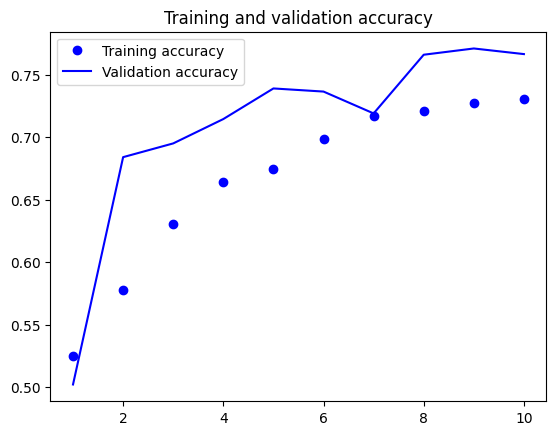

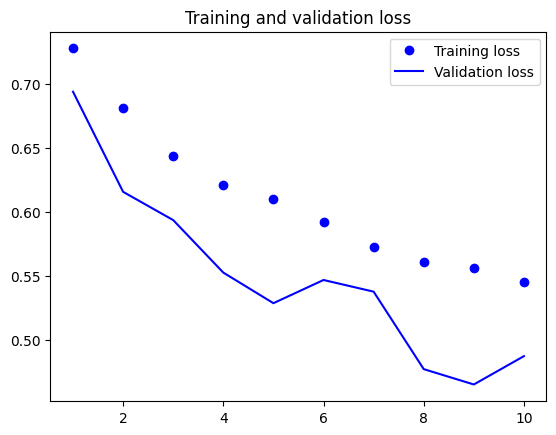

In [10]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

In [11]:
#evaluating the model
test_model = keras.models.load_model("image_classification.keras")
test_model.evaluate(test_dataset)

63/63 [==============================] - 3s 33ms/step - loss: 0.4649 - accuracy: 0.7710


[0.46489569544792175, 0.7710000276565552]

so the accuracy is around 72 %. so using more data by data augmentation and dropouts in dense layer, we can increase the accuracy.

In [12]:
import cv2
test_img = cv2.imread('/content/dataset/single_prediction/cat_or_dog_2.jpg')
test_img = cv2.resize(test_img,(180,180))
test_input = test_img.reshape((1,180,180,3))

In [13]:
test_model.predict(test_input)

1/1 [==============================] - 0s 351ms/step


array([[0.22366573]], dtype=float32)

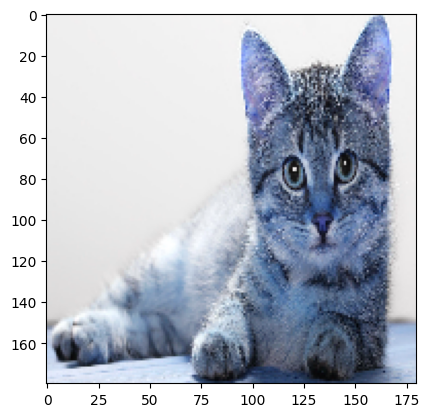

In [14]:
plt.imshow(test_img)

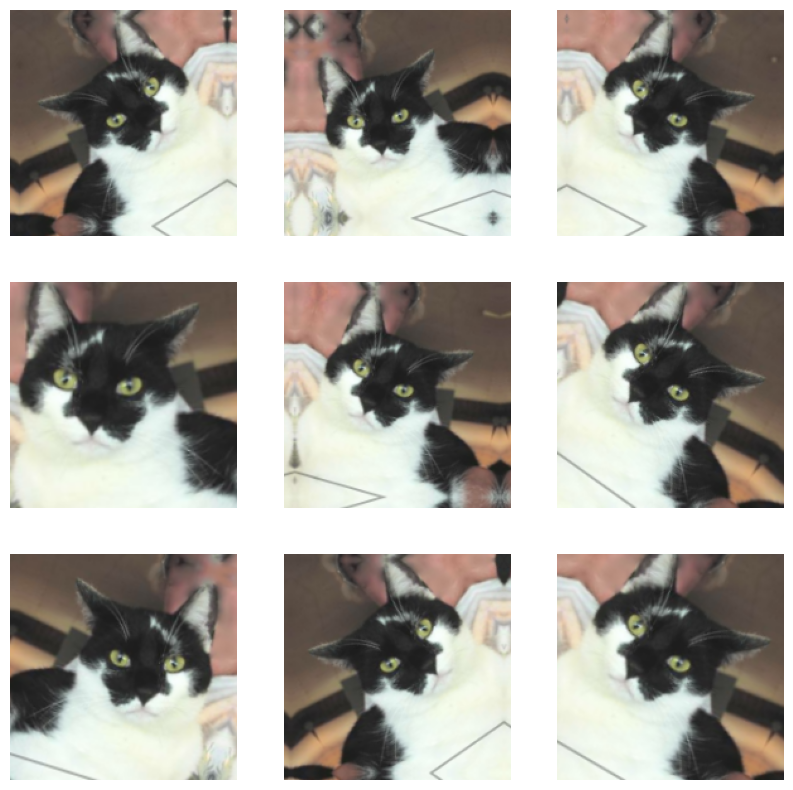

In [ ]:
# displaying augmented images
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_dataset.take(2):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis('off')

In [ ]:
# using pretrained model like vgg16 that is trained on imagenet dataset (transfer learning)

In [16]:
# feature extraction method
from tensorflow import keras
from tensorflow.keras import layers
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False
)
conv_base_trainable = False

In [17]:
inputs = keras.Input(shape = (180,180,3))
data_augmentation= keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256,activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model = keras.Model(inputs,outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )


In [18]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/20
250/250 [==============================] - 85s 330ms/step - loss: 0.6998 - accuracy: 0.8345 - val_loss: 0.1021 - val_accuracy: 0.9645
Epoch 2/20
250/250 [==============================] - 82s 325ms/step - loss: 0.1428 - accuracy: 0.9440 - val_loss: 0.0811 - val_accuracy: 0.9685
Epoch 3/20
250/250 [==============================] - 81s 325ms/step - loss: 0.0991 - accuracy: 0.9604 - val_loss: 0.0811 - val_accuracy: 0.9805
Epoch 4/20
250/250 [==============================] - 85s 341ms/step - loss: 0.0778 - accuracy: 0.9718 - val_loss: 0.0887 - val_accuracy: 0.9765
Epoch 5/20
250/250 [==============================] - 82s 326ms/step - loss: 0.0758 - accuracy: 0.9736 - val_loss: 0.1251 - val_accuracy: 0.9710
Epoch 6/20
172/250 [===================>..........] - ETA: 23s - loss: 0.0576 - accuracy: 0.9804

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_dataset)

In [11]:
# using fine tunning method
from tensorflow import keras
from tensorflow.keras import layers
conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False
)
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable=False

In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [13]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model1 = keras.Model(inputs, outputs)

In [14]:
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model1.fit(train_dataset,epochs=20,validation_data = test_dataset)

Epoch 1/20
250/250 [==============================] - 40s 150ms/step - loss: 1.7813 - accuracy: 0.8484 - val_loss: 0.2970 - val_accuracy: 0.9570
Epoch 2/20
250/250 [==============================] - 36s 143ms/step - loss: 0.3039 - accuracy: 0.9266 - val_loss: 0.2131 - val_accuracy: 0.9685
Epoch 3/20
250/250 [==============================] - 36s 142ms/step - loss: 0.1772 - accuracy: 0.9430 - val_loss: 0.1484 - val_accuracy: 0.9695
Epoch 4/20
250/250 [==============================] - 36s 144ms/step - loss: 0.1278 - accuracy: 0.9546 - val_loss: 0.1936 - val_accuracy: 0.9695
Epoch 5/20
250/250 [==============================] - 36s 143ms/step - loss: 0.1191 - accuracy: 0.9619 - val_loss: 0.1621 - val_accuracy: 0.9770
Epoch 6/20
250/250 [==============================] - 37s 146ms/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.1733 - val_accuracy: 0.9735
Epoch 7/20
250/250 [==============================] - 36s 145ms/step - loss: 0.0821 - accuracy: 0.9726 - val_loss: 0.1756 - val_ac

In [16]:
model1.evaluate(test_dataset)

63/63 [==============================] - 7s 102ms/step - loss: 0.2149 - accuracy: 0.9805


[0.21490326523780823, 0.9804999828338623]

so we increased the accuracy to 98 %


In [20]:
import cv2
test_img = cv2.imread('/content/dataset/single_prediction/cat_or_dog_1.jpg')
test_img = cv2.resize(test_img,(180,180))
test_input = test_img.reshape((1,180,180,3))

In [21]:
model1.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)